In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time

In [108]:
#pip install neuralcoref

In [12]:
df_movie = pd.read_table("movie.metadata.tsv", header = None)
df_movie.columns = ['Wiki movie ID', 'Free movie ID', 'Name', 'Release date', 'Box office revenue', 'Runtime', 'Languages','Countries', 'Genres']
df_movie.head(3)

,Wiki movie ID,Free movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [13]:
df_movie['Languages'] = [lang.split('"')[3::4] for lang in df_movie.Languages]
df_movie['Countries'] = [lang.split('"')[3::4] for lang in df_movie.Countries]
df_movie['Genres'] = [lang.split('"')[3::4] for lang in df_movie.Genres]

df_movie = df_movie[df_movie['Release date'].notna()]
df_movie['Release date'] = df_movie['Release date'].apply(lambda x : datetime.strptime(str(x)[0:4],"%Y")) #keeping only the year
df_movie['Release date'] = [date.year for date in df_movie['Release date']]  #Expliquer pourquoi on garde que l'année

In [14]:
min(df_movie['Release date'])

1010

We discovered an error in one of the dates of the movies. Indeed, the earliest movie in the dataset is from 1010, however this is not possible. Thus, we looked for the true release date of this movie by using its name and origin. We found that its release year is actually 2010 thus we assume that there was simply a mistake in the first number. Now that we have the true year of release, we modify the value in the data.

In [15]:
df_movie = df_movie.replace(1010, 2010)

In [16]:
df_movie[df_movie['Name'] == 'Hunting Season']

,Wiki movie ID,Free movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
62836,29666067,/m/0fphzrf,Hunting Season,2010,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]"


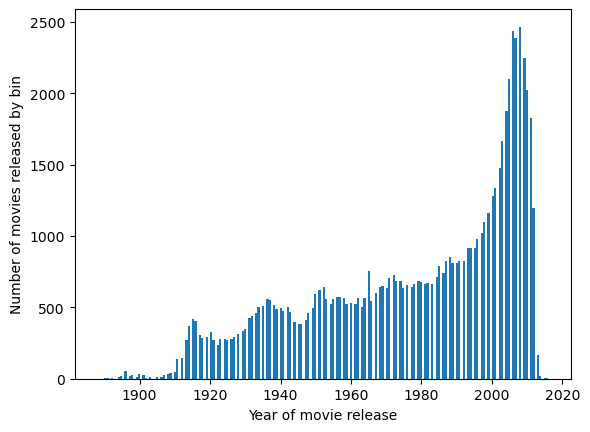

In [284]:
plt.hist(df_movie['Release date'], bins = 200)
plt.xlabel('Year of movie release')
plt.ylabel('Number of movies released by bin')
plt.show()

(array([6.129e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([      0. ,  107928.1,  215856.2,  323784.3,  431712.4,  539640.5,
         647568.6,  755496.7,  863424.8,  971352.9, 1079281. ]),
 <BarContainer object of 10 artists>)

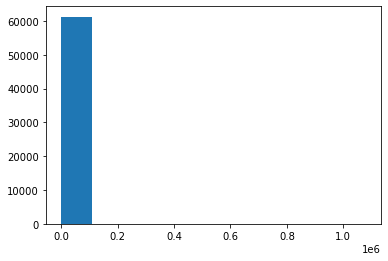

In [69]:
#Not important for us
plt.hist(df_movie['Runtime'], bins = 10)
plt.show()

In [ ]:
plt.hist(df_movie['Languages'])
plt.show()

In [17]:
categ_df = df_movie.groupby(df_movie['Languages']).count

In [18]:
categ_df

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000266A66371C0>>

In [ ]:
boxplot
describe

In [19]:
#Characters data
df_characters = pd.read_table("character.metadata.tsv", header = None)
df_characters.columns = ['Wiki movie ID', 'Free movie ID', 'Release date', 'Character name', 'Actor DOB', 'Gender', 'Height', 'Ethnicity', 'Actor name', 'Age at release', 'Charac/actor map', 'Free charac ID ', 'Free actor ID']
df_characters.head(3)

,Wiki movie ID,Free movie ID,Release date,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,Free charac ID,Free actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l


In [20]:
df_characters = df_characters[df_characters['Release date'].notna()]
df_characters['Release date'] = df_characters['Release date'].apply(lambda x : datetime.strptime(str(x)[0:4],"%Y")) #keeping only the year
df_characters['Release date'] = [date.year for date in df_characters['Release date']]  #Expliquer pourquoi on garde que l'année
df_characters = df_characters.replace(1010, 2010)

In [21]:
df_characters[df_characters['Wiki movie ID'] == 29666067].head(2)

,Wiki movie ID,Free movie ID,Release date,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,Free charac ID,Free actor ID
67624,29666067,/m/0fphzrf,2010,Kamuran,1983,M,NaN,NaN,Bartu Küçükçaglayan,NaN,/m/0n4fxh5,/m/0n4fxh8,/m/0df0qkt
67625,29666067,/m/0fphzrf,2010,Ferman,1941-12-26,M,NaN,NaN,Şener Şen,NaN,/m/0gb33kh,/m/0n4fgzm,/m/02z247j


In [22]:
merged_charac = pd.merge(left = df_characters, right = df_movie, on = 'Wiki movie ID', how = 'left')
merged_charac.head(5)

,Wiki movie ID,Free movie ID_x,Release date_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,...,Free charac ID,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,2001,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,...,/m/0bgcj3x,/m/03wcfv7,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,...,/m/0bgchn4,/m/0346l4,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
2,975900,/m/03vyhn,2001,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,...,/m/0bgchn_,/m/01vw26l,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,...,/m/0bgchnq,/m/034hyc,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,...,/m/0bgchp9,/m/01y9xg,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."


In [23]:
#Taking first genre mentionned as main genre, ignoring rows with no genre
merged_charac['Main genre'] = merged_charac['Genres'].apply(lambda x :x[0] if (x != []) else None) 

In [24]:
df_characters_F = merged_charac[merged_charac['Gender'] == 'F']
df_characters_M = merged_charac[merged_charac['Gender'] == 'M']

In [25]:
Nb_charac_F = df_characters_F.groupby('Release date_x').count()
Nb_charac_M = df_characters_M.groupby('Release date_x').count()
Nb_charac_M.head(3)

,Wiki movie ID,Free movie ID_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,Charac/actor map,...,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres,Main genre
Release date_x,,,,,,,,,,,,,,,,,,,,,
1888,2,2,0,0,2,0,0,2,0,2,...,2,2,2,2,0,2,2,2,2,2
1891,1,1,0,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
1893,2,2,0,1,2,0,0,2,0,2,...,2,2,2,2,0,2,2,2,2,2


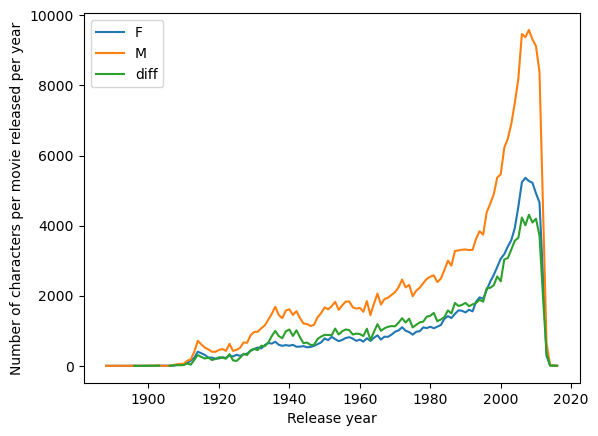

In [26]:
plt.plot(Nb_charac_F['Wiki movie ID'], label = 'F')
plt.plot(Nb_charac_M['Wiki movie ID'], label = 'M')
plt.plot(Nb_charac_M['Wiki movie ID'] - Nb_charac_F['Wiki movie ID'], label = 'diff')
plt.ylabel('Number of characters per movie released per year')
plt.xlabel('Release year')
plt.legend()
plt.show()

In [27]:
genre_ex = merged_charac['Genres'][0]
genre_ex[0]

'Thriller'

In [28]:
empty_genre = merged_charac[merged_charac['Wiki movie ID'] == 32456683]

In [29]:
F_genre = df_characters_F.groupby('Main genre').count()
M_genre = df_characters_M.groupby('Main genre').count()

F_genre = F_genre.sort_values('Wiki movie ID', axis = 0, ascending = False)
M_genre = M_genre.sort_values('Wiki movie ID', axis = 0, ascending = False)

F_genre.head(3)

,Wiki movie ID,Free movie ID_x,Release date_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,...,Free charac ID,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres
Main genre,,,,,,,,,,,,,,,,,,,,,
Drama,18122,18122,18122,8772,14360,18122,5630,4070,18122,13048,...,8772,18122,18122,18122,18122,2085,15405,18122,18122,18122
Thriller,17385,17385,17385,10198,14566,17385,8630,4796,17385,13811,...,10198,17385,17385,17385,17385,5830,16459,17385,17385,17385
Romantic comedy,9286,9286,9286,5355,8234,9286,5422,3053,9286,7776,...,5355,9286,9286,9286,9286,4243,9134,9286,9286,9286


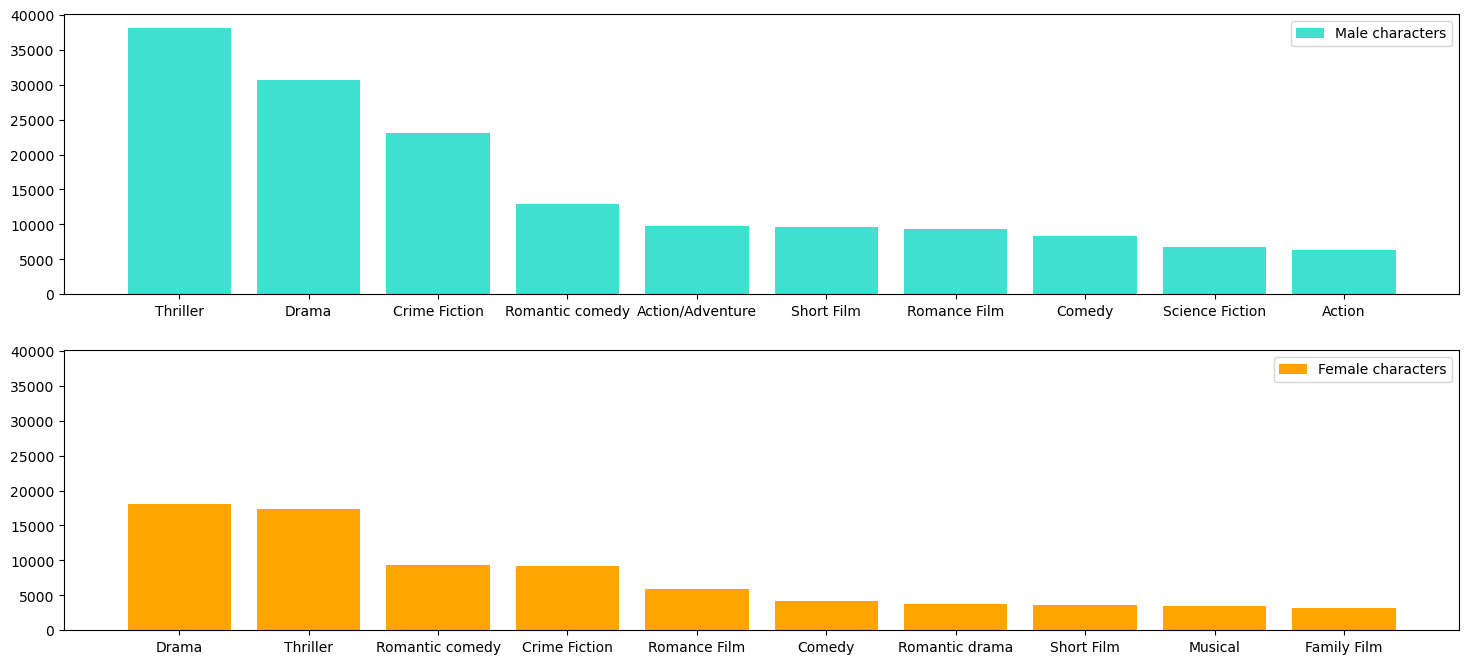

In [30]:
fig, ax = plt.subplots(2,1, figsize = (18,8), sharey = True)   #share x ??

ax[0].bar(M_genre.index[0:10], M_genre['Wiki movie ID'][0:10], label = 'Male characters', color = 'turquoise')
ax[0].legend()
ax[1].bar(F_genre.index[0:10], F_genre['Wiki movie ID'][0:10], label = 'Female characters', color = 'orange')
ax[1].legend()
plt.show()

In [40]:
import plotly
import plotly.tools as tls

plotly_fig = tls.mpl_to_plotly(fig)
#plotly.offline.plot(plotly_fig, filename="plotly version of an mpl figure.html")
plotly_fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
#plotly_fig.update_xaxes(type='category')
plotly_fig.update_xaxes(categoryorder='array', categoryarray= ['d','a','c','b'])
plotly_fig.show(renderer='iframe')


In [85]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_yaxes = 'all', vertical_spacing=0.15)

fig.add_bar(x=M_genre.index[0:10], y=M_genre['Wiki movie ID'][0:10],
    row=1, col=1,
    name = 'Male', marker_color = 'turquoise',
    legendgroup = '1'
)

fig.add_bar(x=F_genre.index[0:10], y=F_genre['Wiki movie ID'][0:10],
    row=2, col=1,
    name = 'Female', marker_color = 'orange',
    legendgroup = '2'
)

fig.update_layout(height=700, width=900, plot_bgcolor="whitesmoke", title=dict(
    text="Comparison between top 10 genres of male vs female characters", 
    y=0.93))

fig.update_layout(yaxis1 = dict(tickformat = 000))
fig.update_layout(yaxis2 = dict(tickformat = 000))

fig.show(renderer='iframe')
fig.write_html("top10genres_barplot.html")

Ce serait intéressant de voir l'évolution de drama, thriller and crime fiction dans le temps

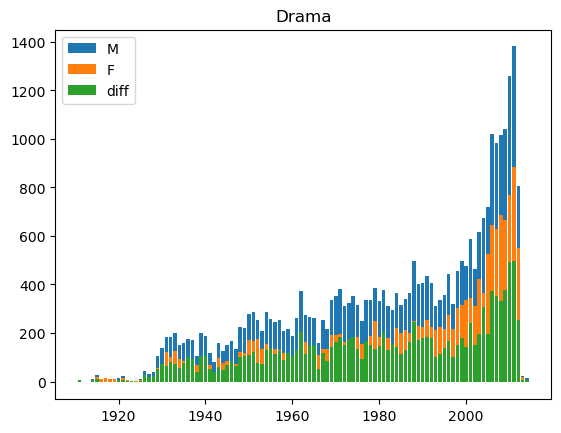

In [276]:
M_drama = df_characters_M[df_characters_M['Main genre'] == 'Drama']
M_drama_year = M_drama.groupby('Release date_x').count()
plt.bar(M_drama_year.index, M_drama_year['Wiki movie ID'], label = 'M')

F_drama = df_characters_F[df_characters_F['Main genre'] == 'Drama']
F_drama_year = F_drama.groupby('Release date_x').count()
plt.bar(F_drama_year.index, F_drama_year['Wiki movie ID'], label = 'F')

plt.bar(F_drama_year.index, M_drama_year['Wiki movie ID'] - F_drama_year['Wiki movie ID'], label = 'diff')
plt.title('Drama')
plt.legend()
plt.show()

La différence en vert permet de voir que l'augmentation des hommes est plus grandes que celles des femmes

**NORMALISER PAR RAPPORT AUX NOMBRES DE FILMS**

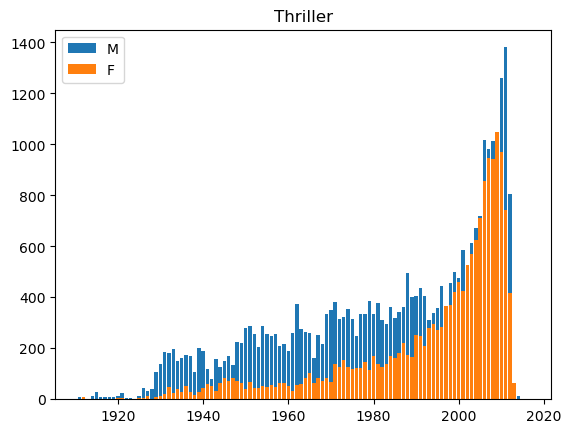

In [277]:
M_thriller = df_characters_M[df_characters_M['Main genre'] == 'Thriller']
M_thriller_year = M_drama.groupby('Release date_x').count()
plt.bar(M_thriller_year. index, M_thriller_year['Wiki movie ID'], label = 'M')

F_thriller = df_characters_F[df_characters_F['Main genre'] == 'Thriller']
F_thriller_year = F_thriller.groupby('Release date_x').count()
plt.bar(F_thriller_year. index, F_thriller_year['Wiki movie ID'], label = 'F')

#plt.bar(F_thriller_year.index, M_thriller_year['Wiki movie ID'] - F_thriller_year['Wiki movie ID'], label = 'diff')

plt.title('Thriller')
plt.legend()
plt.show()

On voit que l'augmentation des femmes est plus grande que celle des hommes.

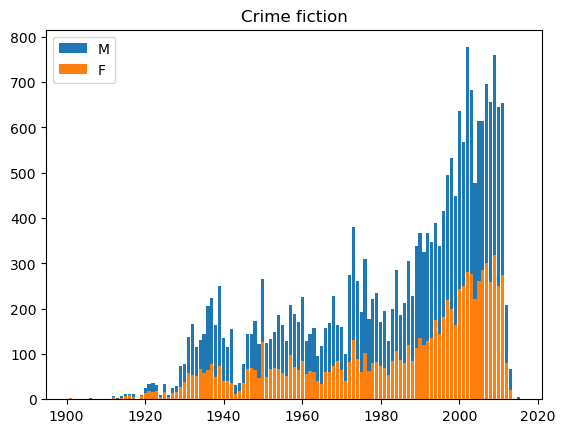

In [280]:
M_CF = df_characters_M[df_characters_M['Main genre'] == 'Crime Fiction']
M_CF_year = M_CF.groupby('Release date_x').count()
plt.bar(M_CF_year.index, M_CF_year['Wiki movie ID'], label = 'M')

F_CF = df_characters_F[df_characters_F['Main genre'] == 'Crime Fiction']
F_CF_year = F_CF.groupby('Release date_x').count()
plt.bar(F_CF_year.index, F_CF_year['Wiki movie ID'], label = 'F')

#plt.bar(F_CF_year.index, M_CF_year['Wiki movie ID'] - F_CF_year['Wiki movie ID'], label = 'diff')

plt.title('Crime Fiction')
plt.legend()
plt.show()

On voit que l'augmentation des hommes est bien plus grande chez les hommes que les femmes.

Est-ce qu'il existe une mesure pour mesurer l'augmentation ?

In [287]:
merged_charac[merged_charac['Main genre'] == 'Comedy']

,Wiki movie ID,Free movie ID_x,Release date_x,Character name,Actor DOB,Gender,Height,Ethnicity,Actor name,Age at release,...,Free actor ID,Free movie ID_y,Name,Release date_y,Box office revenue,Runtime,Languages,Countries,Genres,Main genre
70,18296435,/m/04cqrs4,1986,NaN,1954-06-21,F,NaN,NaN,Müjde Ar,31.0,...,/m/04fd3kh,/m/04cqrs4,Aaah Belinda,1986,NaN,NaN,[Turkish Language],[Turkey],[Comedy],Comedy
99,22087420,/m/05pckh0,1959,NaN,1903-08-24,M,NaN,NaN,Peppino De Filippo,56.0,...,/m/08392m,/m/05pckh0,"Ferdinando I, re di Napoli",1959,NaN,105.0,[Italian Language],"[France, Italy]","[Comedy, Black-and-white]",Comedy
981,11013589,/m/02qy2q7,1981,NaN,1940-11-05,F,1.70,NaN,Elke Sommer,40.0,...,/m/030bvb,/m/02qy2q7,Der Mann im Pyjama,1981,NaN,95.0,[German Language],[West Germany],[Comedy],Comedy
982,11013589,/m/02qy2q7,1981,NaN,1941-06-30,M,NaN,NaN,Otto Sander,39.0,...,/m/07np3f,/m/02qy2q7,Der Mann im Pyjama,1981,NaN,95.0,[German Language],[West Germany],[Comedy],Comedy
1237,6081561,/m/0fp5lk,1979,NaN,1922-10-27,M,NaN,NaN,Michel Galabru,56.0,...,/m/0ff1qp,/m/0fp5lk,Le gendarme et les extra-terrestres,1979,NaN,90.0,[French Language],[France],[Comedy],Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439470,7146019,/m/0h6npj,1986,Sharon Ferris,1946-04-18,F,1.63,NaN,Hayley Mills,40.0,...,/m/03d9wk,/m/0h6npj,The Parent Trap II,1986,NaN,210.0,[English Language],[United States of America],[Comedy],Comedy
439869,19078678,/m/04jj_8_,2007,NaN,1950-10-18,M,1.78,NaN,Om Puri,57.0,...,/m/044ptm,/m/04jj_8_,Dumkata,2007,NaN,94.0,[Hindi Language],[India],[Comedy],Comedy
439870,19078678,/m/04jj_8_,2007,Shree Ranade,NaN,M,NaN,NaN,Sachin Khedekar,NaN,...,/m/0573tj8,/m/04jj_8_,Dumkata,2007,NaN,94.0,[Hindi Language],[India],[Comedy],Comedy
439871,19078678,/m/04jj_8_,2007,Ananya's Mother,1979-02-01,F,NaN,NaN,Vibhawari Deshpande,28.0,...,/m/0d28mq9,/m/04jj_8_,Dumkata,2007,NaN,94.0,[Hindi Language],[India],[Comedy],Comedy


In [289]:
df_movie[df_movie['Wiki movie ID'] == 19078678]

,Wiki movie ID,Free movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
79921,19078678,/m/04jj_8_,Dumkata,2007,NaN,94.0,[Hindi Language],[India],[Comedy]


In [ ]:
The Parent Trap II

## **Activeness score**

In [3]:
#Example of verb list with label: 1 for active verb and 0 for descriptive verb
df_verbs = pd.read_excel("list_verb.xlsx")
df_verbs

,verb,activ_meaning
0,talk,1
1,be,0
2,walk,1
3,run,1
4,look,0
5,seem,0
6,attack,1
7,sleep,0
8,sit,1
9,eat,1


In [3]:
#Example of verbs associated to movie character
list_verb_charac = pd.Series(['attack', 'run', 'look'], name = 'verb')
#Merging with list of all verbs to get activ_meaning value for each verb, left join -> only keep the verbs present with the character
merged_verb = pd.merge(list_verb_charac, df_verbs, how = 'left')
merged_verb

,verb,activ_meaning
0,attack,1
1,run,1
2,look,0


In [4]:
def activeness_score (list_verb_charac):
    #calcul sur 3 composantes:
    # - somme verbes actifs au sens du verbe / tot nbr verbes associés au perso
    # - somme verbe actifs au sens grammaire / tot nbr verbes associés au perso
    # - score adjectif: comment quantifier ça ? sentiment analysis ? How
    # score = moyenne des 3 valeurs
    
    
    #Active meaning part
    #If necessary, depending on format given to function, coordinate with NLP process
    list_verb_charac = pd.Series(list_verb_charac, name = 'verb')
    
    #Merging with list of all verbs to get activ_meaning value for each verb, left join -> only keep the verbs present with the character
    merged_verb = pd.merge(list_verb_charac, df_verbs, how = 'left')
    #Calculating mean of active verbs in terms of meaning compared to number of verbs associated to character
    score_activ_meaning = merged_verb['activ_meaning'].mean()
    
    
    #Active grammar part
    #What will be given ??
    score_activ_grammar = 0
    
    
    #Adjective part
    #Sentiment analysis ??
    score_adjective = 0
    
    score = score_activ_meaning
    
    #Give weights or more importance to some scores ??
    #score = (score_activ_meaning + score_activ_grammar + score_adjective)/3    
    return score

In [5]:
list_verb_charac = ['attack', 'run', 'look']
activeness_score(list_verb_charac)

0.6666666666666666

In [89]:
list_act_charac = ['attack', 'run', 'look']
list_pass_charac = ['take', 'attack']
list_adj = ['beautiful', 'brave', 'young']
ID_movie = 92984
charac_name = 'Mia'

df_Mia = pd.DataFrame([[ID_movie, charac_name, list_act_charac, list_pass_charac, list_adj]], columns = ['movie_ID', 'character_name', 'activ_verbs', 'passive_verbs', 'description'])
df_Mia

,movie_ID,character_name,activ_verbs,passive_verbs,description
0,92984,Mia,"[attack, run, look]","[take, attack]","[beautiful, brave, young]"


In [4]:
df_description_verbs = df_verbs[df_verbs['activ_meaning'] == 0]
df_description_verbs = df_description_verbs.verb
df_description_verbs = list(df_description_verbs)

In [91]:
any(df_Mia.activ_verbs) in df_description_verbs

False

In [92]:
#any(df_Mia.iloc[0].activ_verbs) in df_description_verbs
df_Mia.iloc[0].activ_verbs in df_description_verbs

False

In [93]:
df_Mia.iloc[0].activ_verbs[2]

'look'

In [94]:
df_Mia.iloc[0].activ_verbs[2]

'look'

In [95]:
any(item in df_description_verbs for item in df_Mia.iloc[0].activ_verbs)

True

In [96]:
df_Mia.iloc[0].activ_verbs[2] in df_description_verbs

True

In [97]:
for i in range(len(df_Mia.iloc[0].activ_verbs)):
    verb = df_Mia.iloc[0].activ_verbs[i]
    if verb in df_description_verbs:
        df_Mia.iloc[0].passive_verbs.append(verb)
        df_Mia.iloc[0].activ_verbs.remove(verb)

In [98]:
df_Mia.iloc[0].passive_verbs[1]

'attack'

In [99]:
df_Mia

,movie_ID,character_name,activ_verbs,passive_verbs,description
0,92984,Mia,"[attack, run]","[take, attack, look]","[beautiful, brave, young]"


In [ ]:
df_Mia.iloc[0].apply(lambda verb in )

In [106]:
def activeness_score (df_charac_NLP):  #df_charac_NLP has the same shape as df_Mia, only one row
    
    for i in range(len(df_charac_NLP.activ_verbs)):
        verb = df_charac_NLP.activ_verbs[i]
        if verb in df_description_verbs:
            df_charac_NLP.passive_verbs.append(verb)
            df_charac_NLP.activ_verbs.remove(verb)
        
    score_verb_act = len(df_charac_NLP.activ_verbs) / (len(df_charac_NLP.activ_verbs) + len(df_charac_NLP.passive_verbs))
    
    #add score for adjective, need labeling
    return score_verb_act

In [105]:
activeness_score(df_Mia.iloc[0])

0.4

In [6]:
df_description_verbs.append('appear')

In [8]:
df_description_verbs

['be', 'look', 'seem', 'sleep', 'appear']

In [9]:
df_description_verbs = ['be', 'look', 'seem', 'sleep', 'appear']